# Jupyter 演示文档

这个程序的最大目标是解偏微分方程，为了实现这个目标，我们制作了两种方法，并且分别将它们打包为 `PDESolver` 以及 `TestPDESolver` 并存储在了 `./PDESolver/Solver.py` 文件中。本程序并不保证求解结果的正确性，效率等问题。如果在使用过程中出现任何问题，甚至是对系统造成任何破坏，均与作者无关，作者并不承担任何责任。

以下示例均来自 `./test1.py` 以及 `./test2.py` 文件。程序源码中含有大量注释（这些注释本来是为了给小组成员看的，但是他们仍然什么也不懂，非常令人失望），如有需要，自行参阅。

## `class PDESolver` 演示文件
求解过程依赖于 `sympy` ，故效率低下

导入函数库

In [1]:
# 从"./PDESolver/Solver.py"中导入class PDEFunction
from PDESolver.Solver import PDEFunction
# 导入其他python库
import matplotlib.pylab as p
import sympy
import numpy

构建偏微分方程

In [2]:
# 定义符号，用于表示各种偏导数
# 此处a为对x的二阶导，c为对y的二阶导
a=sympy.symbols("a")
c=sympy.symbols("c")

eq = a + c
# 这里a代表U对x的二阶偏导，c代表U对y的二阶偏导，因此，它描述了一个方程：
# $\frac{\partial^2 U}{\partial x^2}+\frac{\partial^2 U}{\partial y^2}=0$

solver = PDEFunction(eq,a=a,c=c)
# 利用上面的eq从PDEFunction类构建solver对象

创建初值画布以及掩码画布

In [3]:
solver = PDEFunction(eq,a=a,c=c)
# 利用上面的eq从PDEFunction类构建solver对象

# 此处构建了canvas和mask，canvas指的是初值，mask是用来表示哪个数字是不可变的，其本质为二维数组
canvas = []
# canvas: 设定的初始值
mask = []
# mask: 用于确定哪些值是不可变更的，记录为True

size = 50
# 我们构建了一个50*50的画布

for i in range(size):
    # 这个循环使得canvas的第一列都取值100，其余都取值0。
    # 取值的100和0可以根据需要任意的更改。
    canvas.append([])
    mask.append([])
    canvas[i].append(100)
    mask[i].append(True)
    for j in range(size - 1):
        canvas[i].append(0)
        mask[i].append(False)

获得绘图数据

In [4]:
result = solver.solve(canvas,mask,maxIter=20)
# 此处调用了solver对象的solve方法，solve方法在solver.py的class PDEFunction中定义
# 为了让数据更加准确，以及时间考虑，我们迭代了20次，算出的结果值赋给了result变量

# 以下为画图部分

# 先设定数据
x = []
y = []
z = numpy.array(result)

for i in range(size):
    x.append(i)
    y.append(i)

X,Y = numpy.meshgrid(x,y)

利用 `matplotlib.pylab` 绘图

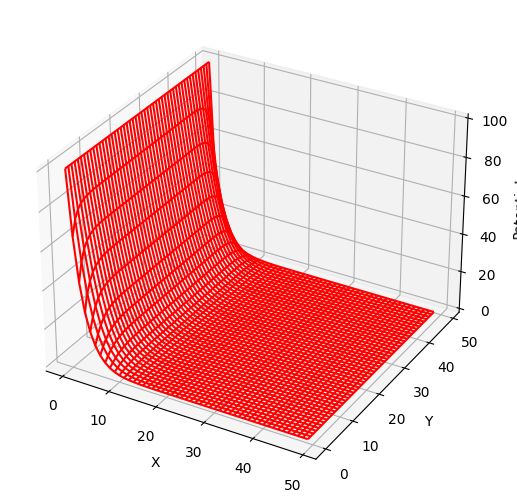

In [5]:
# 这个部分是通过设定x轴，y轴，z轴，颜色，标签等属性并使用matplotlib.pylab将结果以图像的形式呈现出来
fig = p.figure()
ax = fig.add_axes((0,0,1,1),projection="3d")
ax.plot_wireframe(X, Y, z, color = 'r') # type: ignore
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential') # type: ignore
fig.add_axes(ax)
p.show()

## `class TestPDESolver` 演示文件
求解过程不依赖于 `sympy` ，转而使用 `numpy` ，效率有很大提升

导入函数库

In [6]:
# 于是我们来到了test2.py，这个部分所使用的代码与test1中的不同
# 我们已经将相关代码封装为了TestPDEFunction
# test1.py主要是依靠sympy进行计算，而test2.py依靠numpy，速度有了极大的提升

# 从"./PDESolver/Solver.py"中导入class TestPDEFunction
from PDESolver.Solver import TestPDEFunction

# 导入其他python库
import numpy
import matplotlib.pylab as p

构建偏微分方程

In [7]:
# 下面的代码使用到了lambda
# lambda是“匿名函数”，lambda x,y:x 相当于 def func(x,y): return x
# 它的出现纯属是为了码农们可以少打点字，也就是说，下面的形参要求以函数作为参数传入
func = TestPDEFunction(
    # A，B，C，D，E，F是关于变量x，y的函数
    # 这些字母与公式$A\frac{\partial^2 U}{\partial x^2}+2B\frac{\partial^2 U}{\partial x \partial y}+C\frac{\partial^2 U}{\partial y^2}+D\frac{\partial U}{\partial x}+E\frac{\partial U}{\partial y}=F\tag{0.1}$中的字母完全对应
    A=lambda x, y: 1,
    B=lambda x, y: 0,
    C=lambda x, y: 1,
    D=lambda x, y: 0,
    E=lambda x, y: 0,
    F=lambda x, y: 0,
)

创建初值画布以及掩码画布

In [8]:
Nmax = 41  # 画布大小
# 我们构建了41*41的画布，并设置它们全为零
canvas = numpy.zeros((Nmax, Nmax), float)
# 我们还构建了41*41的掩码画布，并设置它们全为False
mask = numpy.zeros((Nmax, Nmax), bool)

# 这与test1中所构建的画布相似，取值是第一列为100，其余都为0。
canvas[:, 0:1] = 100.0

# 且标定第一列为固定值
mask[:, 0:1] = True
# 这里还固定了最后一列为固定值
mask[:, -1:] = True
# 首行与首列也为固定值
mask[0:1, :] = True
mask[-1:, :] = True

获得绘图数据

In [9]:
z = func.solve(canvas, mask, maxIter=10240, expansion=2)
# 此处的solve方法多了expansion参数，它则是将画布进行更细致的分割，以使得最终的结果更加准确

# 以下为画图部分

# 先设定数据
x = []
y = []

for i in range(Nmax):
    x.append(i)
    y.append(i)

X, Y = numpy.meshgrid(x, y)

利用 `matplotlib.pylab` 绘图

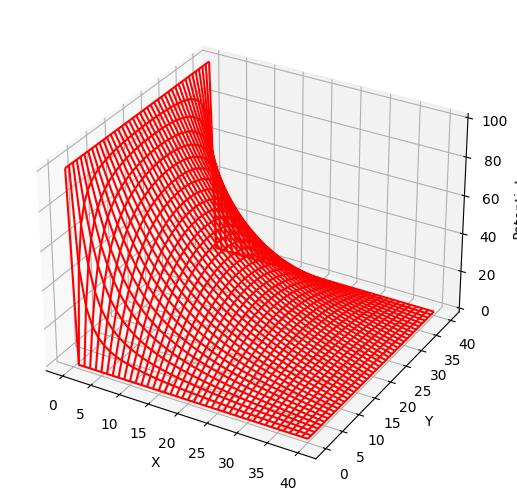

In [10]:
# 这个部分和test1相同是通过设定x轴，y轴，z轴，颜色，标签等属性
# 并使用matplotlib.pylab将结果以图像的形式呈现出来
fig = p.figure()
ax = fig.add_axes((0, 0, 1, 1), projection="3d")
ax.plot_wireframe(X, Y, z, color="r") # type: ignore
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Potential") # type: ignore
fig.add_axes(ax)
p.show()

## `Solver.py` 使用说明

已经使用 `pydoc` 生成[使用说明](PDESolver/Solver.html)，虽然不知道为什么它看起来如此丑陋